# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [10]:
install.packages("Rtsne")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [12]:
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [16]:
wine <- read_csv("wine.csv")
colnames(wine)
summary(dplyr::select(wine, where(is.numeric)))

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Alcohol"                      "Malicacid"                   
 [3] "Ash"                          "Alcalinity_of_ash"           
 [5] "Magnesium"                    "Total_phenols"               
 [7] "Flavanoids"                   "Nonflavanoid_phenols"        
 [9] "Proanthocyanins"              "Color_intensity"             
[11] "Hue"                          "0D280_0D315_of_diluted_wines"
[13] "Proline"                      "class"

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?
Because the wine dataset’s variables are measured on very different scales (e.g., Proline ranges up to 1680, 
while Malicacid only goes up to ~6), variables with larger ranges would dominate the principal components if left unscaled. 
Scaling and centering ensures all variables have mean 0 and standard deviation 1, so each contributes equally to PCA 
and the analysis reflects true patterns in the data rather than differences in measurement units.


In [21]:
wine_scaled <- wine %>%
  mutate(across(-class, ~ as.numeric(scale(.))))
wine_scaled

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?
PC1: 0.362 PC2: 0.1921

#### c) Why are we doing PCA first?
We do PCA because the dataset has many correlated variables on different scales. PCA reduces these to a smaller set of uncorrelated principal components that capture most of the variance. This helps with dimensionality reduction, visualization, and identifying patterns that aren’t obvious in the raw variables.

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?
The scatterplot shows three distinct clusters along PC1 and PC2 that correspond to the wine classes. This separation means that the first two principal components capture enough variance to distinguish between wine types. In context, the chemical properties measured (alcohol, phenols, flavanoids, etc.) explain differences in wine composition strongly enough that PCA can separate the three classes into well-defined groups.

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
PCA will fail when the data lies on a nonlinear structure. Data shaped like an “S-curve” (Swiss roll in 3D). PCA flattens it incorrectly because it can’t capture the nonlinear manifold.

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.
A vector space is a flat, linear space where relationships between variables can be captured with straight-line combinations, which is what PCA assumes. A manifold, on the other hand, is a curved, nonlinear space that may look flat locally but has a more complex global structure. This matters because PCA works well when data lies in a linear vector space, but many real-world datasets follow nonlinear manifolds, so we use methods like t-SNE to capture these nonlinear patterns by preserving local structure.

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


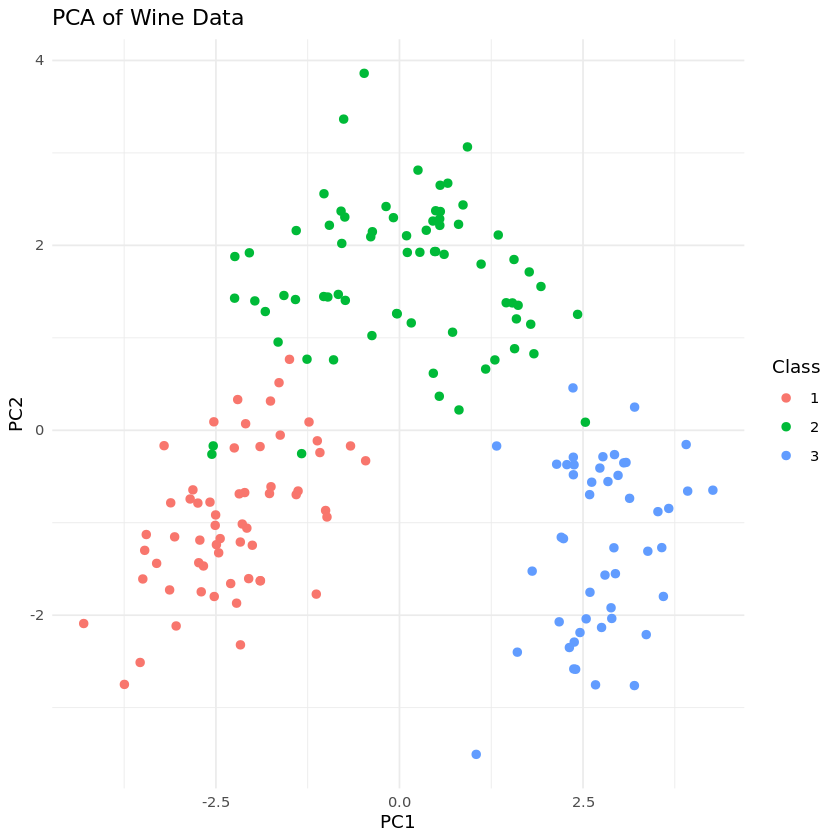

In [24]:
wine_pca <- prcomp(wine_scaled %>% select(-class), center = FALSE, scale. = FALSE)
summary(wine_pca)
wine_pca$rotation
pc_data <- as.data.frame(wine_pca$x) %>%
  mutate(class = wine_scaled$class)

ggplot(pc_data, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 2) +
  labs(title = "PCA of Wine Data", color = "Class") +
  theme_minimal()

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?
PCA is a linear method, so it can only capture variance along straight-line directions. While PCA showed separation of classes, more complex or nonlinear patterns in the data may not be fully revealed. T-SNE goes further by uncovering the nonlinear manifold structure, preserving local neighborhoods and revealing clustering structure that PCA may miss.

#### d) What other types of data does this workflow make sense for?
This PCA then T-SNE workflow is useful for high-dimensional data where patterns may lie on nonlinear manifolds, such as genomics, image data, text embeddings, single-cell RNA-seq or other biomedical high-throughput data. Basically, any dataset where variables are numerous, correlated, and potentially nonlinear benefits from dimensionality reduction followed by T-SNE.

Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.611413)!
Learning embedding...
Iteration 50: error is 50.396099 (50 iterations in 0.02 seconds)
Iteration 100: error is 51.127538 (50 iterations in 0.01 seconds)
Iteration 150: error is 50.598560 (50 iterations in 0.01 seconds)
Iteration 200: error is 50.140847 (50 iterations in 0.01 seconds)
Iteration 250: error is 50.024571 (50 iterations in 0.01 seconds)
Iteration 300: error is 0.632583 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.376300 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.367101 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.366323 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.364658 (50 iterations in 0.01 seconds)
Fitting performed in 0.12 seconds.


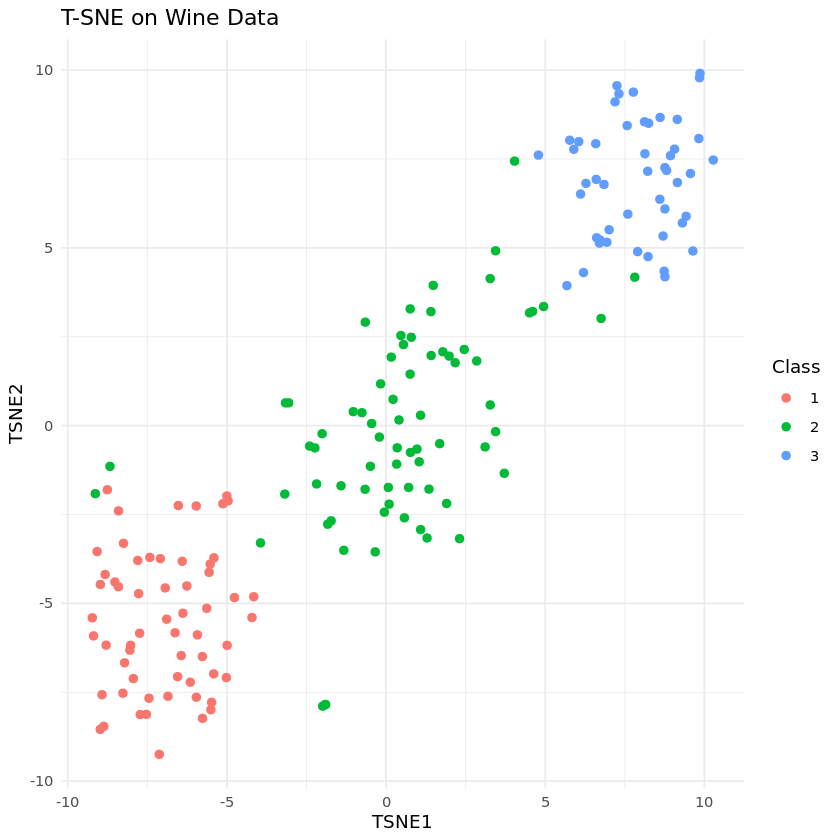

In [26]:
set.seed(123)
pca_subset <- as.data.frame(wine_pca$x[, 1:10]) %>%
  mutate(class = wine_scaled$class) %>%
  distinct()
tsne_out <- Rtsne(pca_subset %>% select(-class), dims = 2, perplexity = 30, verbose = TRUE, max_iter = 500)

tsne_df <- as.data.frame(tsne_out$Y) %>%
  setNames(c("TSNE1", "TSNE2")) %>%
  as_tibble() %>%
  mutate(class = pca_subset$class)

ggplot(tsne_df, aes(x = TSNE1, y = TSNE2, color = factor(class))) +
  geom_point(size = 2) +
  labs(title = "T-SNE on Wine Data", color = "Class") +
  theme_minimal()